In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline  

from torchvision import datasets, transforms
from torch.autograd import Variable

from gan import GAN
from zoo import *

In [2]:
DATA_DIR='data'
BATCH_SIZE = 128
Z_DIM = 50
IMG_DIM = 28 * 28
NUM_EPOCH= 10

torch.manual_seed(1)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1)

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(DATA_DIR,
            train=True,
            download=True,
            transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ])),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Files already downloaded


In [4]:
generator = Generator()
discriminator = Discriminator()
gan = GAN(generator, discriminator, train_loader,
            generator_optim=optim.Adam(generator.parameters(), lr = 2e-6),
            discriminator_optim=optim.Adam(discriminator.parameters(), lr = 2e-4),
            dim_z=Z_DIM,
            dim_out=IMG_DIM,
            k=1,
            batch_size=BATCH_SIZE,
            num_epoch=NUM_EPOCH)
gan.train()

Epoch 0: d_loss: 0.04760506, g_loss: 6.19445765
Epoch 1: d_loss: 0.00024217, g_loss: 10.72208076
Epoch 2: d_loss: 0.00605583, g_loss: 15.69942873
Epoch 3: d_loss: 0.01282003, g_loss: 13.42379503
Epoch 4: d_loss: 0.00518209, g_loss: 14.06218093
Epoch 5: d_loss: 0.04144249, g_loss: 11.64492590
Epoch 6: d_loss: 0.00140954, g_loss: 9.32903124
Epoch 7: d_loss: 0.00082085, g_loss: 12.56423464
Epoch 8: d_loss: 0.04103896, g_loss: 14.06970990
Epoch 9: d_loss: 0.00384011, g_loss: 7.86084967


In [9]:
gan.train()

Epoch 0: d_loss: 0.00055243, g_loss: 10.11332567
Epoch 1: d_loss: 0.00052009, g_loss: 18.13492492
Epoch 2: d_loss: 0.00000000, g_loss: 27.63100027
Epoch 3: d_loss: 0.00000000, g_loss: 27.63100017
Epoch 4: d_loss: 0.00000000, g_loss: 27.63099994
Epoch 5: d_loss: 0.00000000, g_loss: 27.63099986
Epoch 6: d_loss: 0.00000000, g_loss: 27.63099965
Epoch 7: d_loss: 0.00000000, g_loss: 27.63099949
Epoch 8: d_loss: 0.00000000, g_loss: 27.63099928
Epoch 9: d_loss: 0.00000000, g_loss: 27.63099893


In [5]:
z = torch.randn(64, Z_DIM)
samples = gan.sample(z)

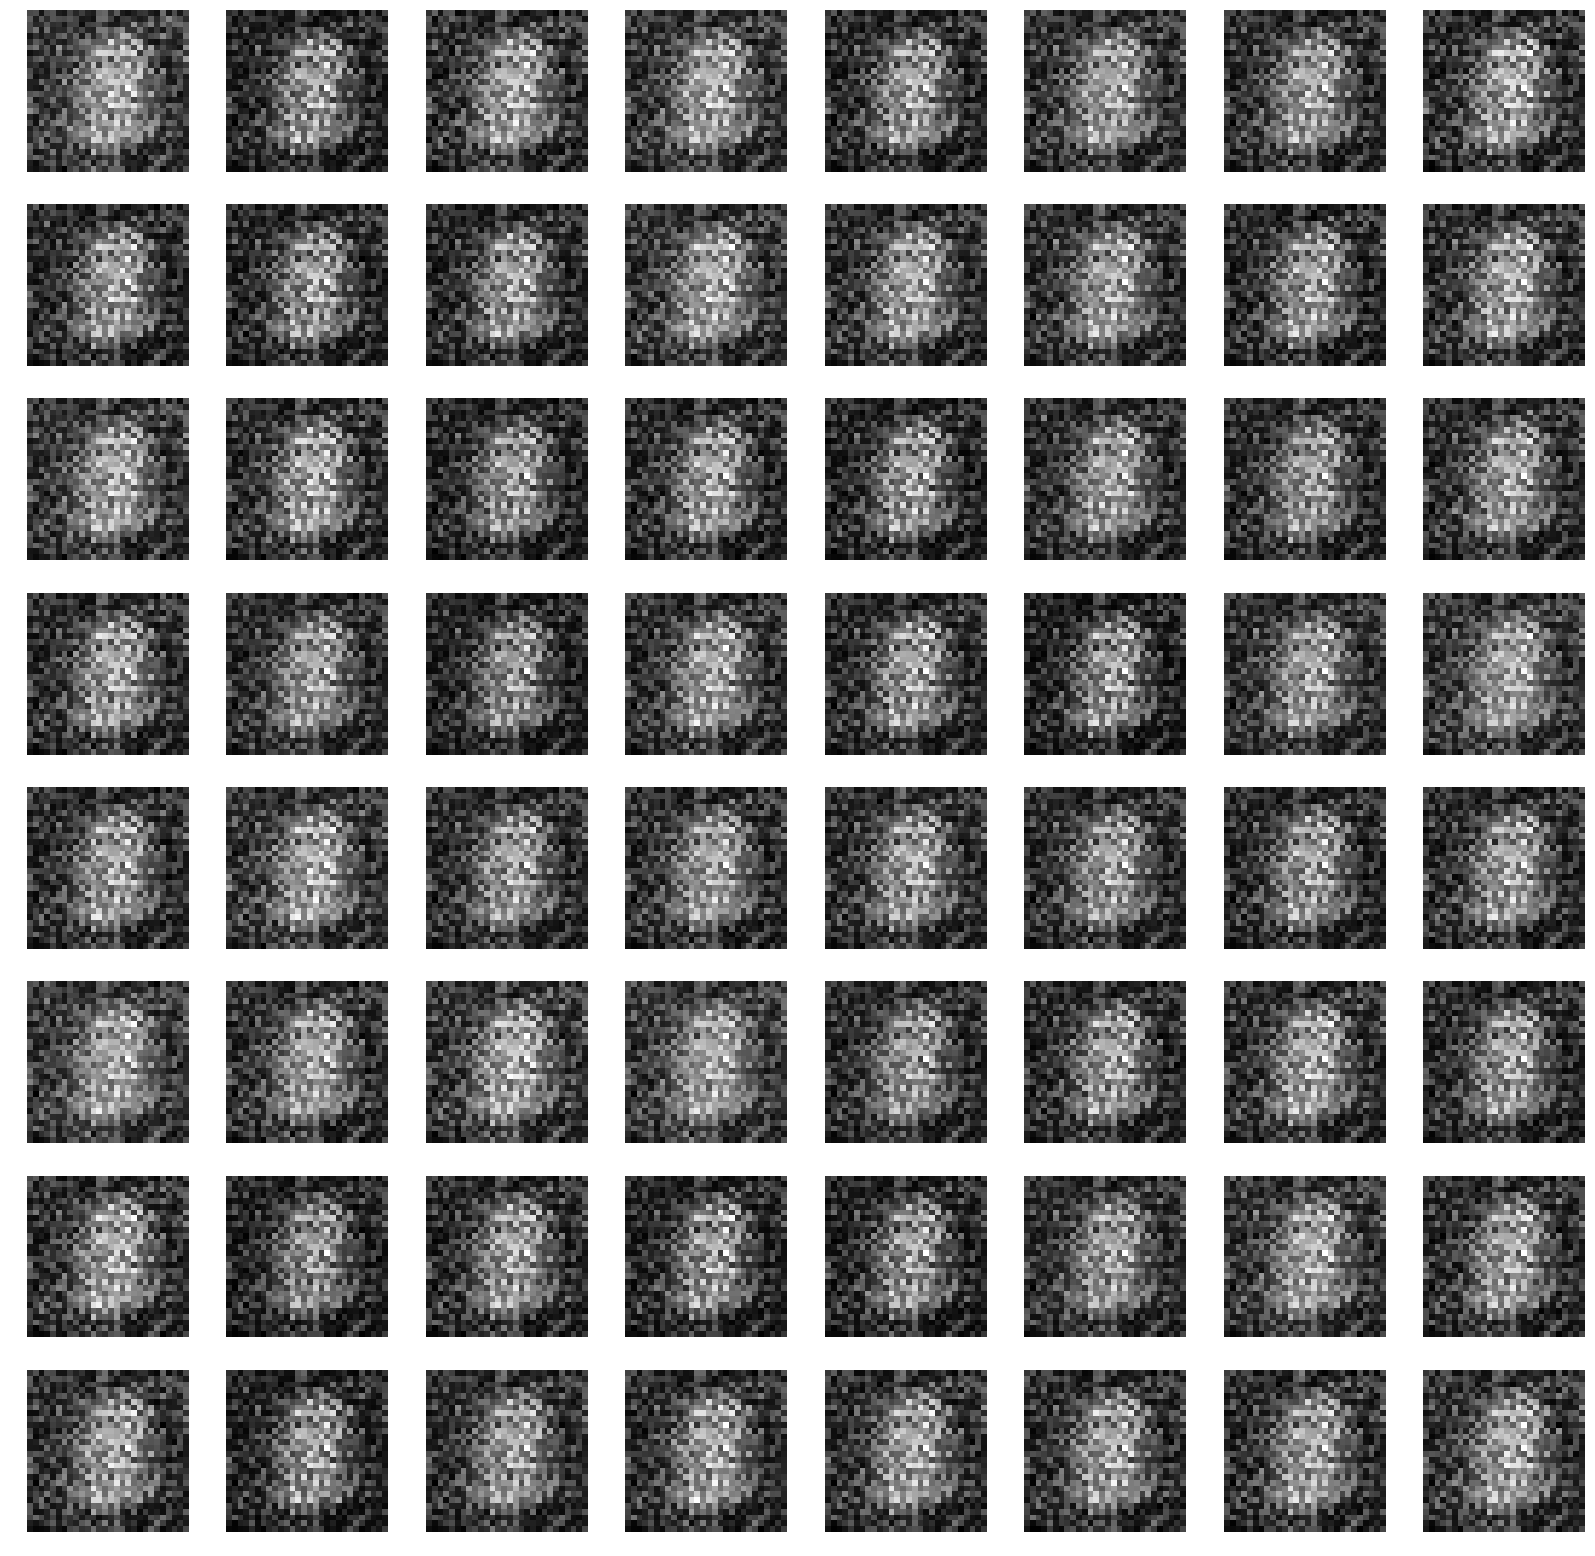

In [6]:
fig=plt.figure(figsize=(28, 28))
for i in range(1, 8*8 +1):
    fig.add_subplot(8, 8, i)
    plt.imshow(samples[i-1, 0], cmap='gray')
    plt.axis('off')
plt.show()

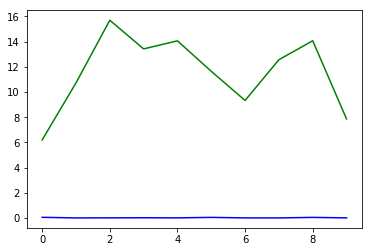

In [7]:
d_loss, g_loss = gan.get_losses()
plt.plot(d_loss, 'b')
plt.plot(g_loss, 'g')
plt.show()

In [8]:
# torch.save(gan, 'gan-10-epoch-lr-2e62e4.pt')